<a href="https://colab.research.google.com/github/phew-phew/Pattern_Recognition/blob/main/Neural_net_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To Build a neural network with 1 hidden layer of 30 sigmoid nodes, and an output layer 10 softmax nodes from 1000 training images (100 images per digit).

Training:  30 complete epochs, using mini-batches of 10 training examples at a time, learning rate η=0.1. 

Plots: Training error, testing error, criterion function on training data set, criterion function on testing data set of a separate 1000 testing images (100 images per digit), and the learning speed of the hidden layer (the average absolute changes of weights divided by the values of the weights).  

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import pandas as pd
%matplotlib inline

In [2]:
mnist = tf.keras.datasets.mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test =  x_test / 255.0
print(x_train.shape,'xtrain shape')
print(x_test.shape,'xtest shape')

(60000, 28, 28) xtrain shape
(10000, 28, 28) xtest shape


In [5]:
x_val = x_train[-10000:]
y_val = y_train[-10000:]

x_train = x_train[:x_train.shape[0]-10000]
y_train = y_train[:y_train.shape[0]-10000]

data = {}

for i in range(10):
    data[i] = list()

for i in range(len(x_train)):
    data[y_train[i]].append(x_train[i])

In [6]:
train_x = list()
train_y = list()

for i in range(len(data)):
    for j in range(100):
        train_x.append(data[i][j])
        train_y.append(i)

train_x = np.asarray(train_x)
train_y = np.asarray(train_y)

In [10]:
train_x=train_x.reshape(1000,784)
x_val = x_val.reshape(10000,784)
x_test = x_test.reshape(10000,784)

#For single Hidden layer

In [11]:
from keras.models import Sequential
import time
from keras.layers import Dense, Activation
model = Sequential()
start_time = time.time()
model.add(Dense(30, activation= "sigmoid"))
model.add(Dense(10, activation='softmax'))
weights=[]
save_weights = tf.keras.callbacks.LambdaCallback(on_epoch_end=lambda batch, logs: weights.append(model.layers[0].get_weights()[0]))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
m_h = model.fit(train_x, train_y,validation_data = (x_val,y_val), epochs=30, batch_size=10, callbacks = [save_weights])
final_w = [model.layers[0].get_weights()[0]]
weights = [weights]
total_time = (time.time()-start_time)
print("--- %s seconds ---" % total_time)

Epoch 1/30
100/100 [==============================] - 2s 13ms/step - loss: 1.8836 - accuracy: 0.3636 - val_loss: 0.9342 - val_accuracy: 0.7101
Epoch 2/30
100/100 [==============================] - 1s 8ms/step - loss: 1.0309 - accuracy: 0.6730 - val_loss: 1.1493 - val_accuracy: 0.6275
Epoch 3/30
100/100 [==============================] - 1s 8ms/step - loss: 0.8347 - accuracy: 0.7159 - val_loss: 1.0075 - val_accuracy: 0.6881
Epoch 4/30
100/100 [==============================] - 1s 8ms/step - loss: 0.8093 - accuracy: 0.7351 - val_loss: 0.9118 - val_accuracy: 0.7054
Epoch 5/30
100/100 [==============================] - 1s 8ms/step - loss: 0.7595 - accuracy: 0.7451 - val_loss: 0.9616 - val_accuracy: 0.7238
Epoch 6/30
100/100 [==============================] - 1s 8ms/step - loss: 0.6335 - accuracy: 0.7927 - val_loss: 0.8666 - val_accuracy: 0.7407
Epoch 7/30
100/100 [==============================] - 1s 8ms/step - loss: 0.6283 - accuracy: 0.8126 - val_loss: 0.8180 - val_accuracy: 0.7519
Epoch

In [17]:
predict_train = model.predict_classes(train_x)
acc_train = np.where(train_y == predict_train)[0].shape[0]/train_x.shape[0]
print('Training accuracy for 1 layer = {}'.format(acc_train))
predict_test = model.predict_classes(x_test)
acc_test = np.where(y_test == predict_test)[0].shape[0]/x_test.shape[0]
print('Testing accuracy for 1 layer = {}'.format(acc_test))
print('Total run time = {} seconds'.format(total_time))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Training accuracy for 1 layer = 0.875
Testing accuracy for 1 layer = 0.7911
Total run time = 25.17742156982422 seconds


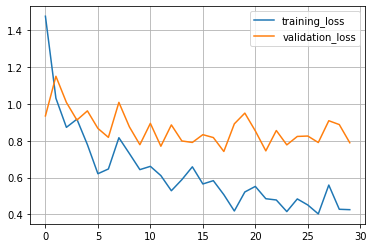

In [18]:
df = pd.DataFrame()
df['training_loss'] = m_h.history['loss']
#df['accuracy'] = model_history.history['accuracy']
df['validation_loss'] = m_h.history['val_loss']
df.plot(grid=True)

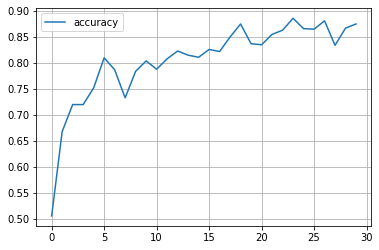

In [19]:
df = pd.DataFrame()
df['accuracy'] = m_h.history['accuracy']
df.plot(grid=True)

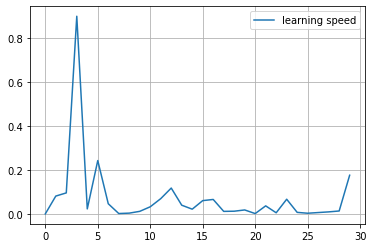

In [20]:
df = pd.DataFrame()
for i in range(0,len(weights)):
        w = weights[i]
        W = final_w[i]
        learning_speed = [0]
        for i in range(1,len(w)):
            wold = w[i-1]
            wnew = w[i]
            diff = wold-wnew
            d = wnew
            m = np.median(d[d>0])
            d[d==0] = m
            diff = abs(diff)/d
            if diff.size:
                avg = abs(np.mean(diff))
            else:
                avg = 0
            learning_speed.append(avg)
        df['learning speed'] = learning_speed
        df.plot(grid=True)

In [22]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                23550     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                310       
Total params: 23,860
Trainable params: 23,860
Non-trainable params: 0
_________________________________________________________________
None


#For 2  and 3 Hidden layers

2 Hidden layers

In [23]:
from keras.callbacks import LambdaCallback
model2 = Sequential()
start_time = time.time()
model2.add(Dense(30, activation= "sigmoid"))
model2.add(Dense(30, activation= "sigmoid"))
model2.add(Dense(10, activation='softmax'))
weights1 = []
weights2 = []
save_weights1 = LambdaCallback(on_epoch_end=lambda batch, logs: weights1.append(model2.layers[0].get_weights()[0]))
save_weights2 = LambdaCallback(on_epoch_end=lambda batch, logs: weights2.append(model2.layers[1].get_weights()[0]))
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
m_h2 = model2.fit(train_x, train_y,validation_data = (x_val,y_val), epochs=30, batch_size=10,callbacks = [save_weights1,save_weights2])
final_w = [model2.layers[0].get_weights()[0],model2.layers[1].get_weights()[0]]
weights = [weights1,weights2]
total_time = (time.time()-start_time)
print("--- %s seconds ---" % total_time)

Epoch 1/30
100/100 [==============================] - 1s 10ms/step - loss: 2.3803 - accuracy: 0.1414 - val_loss: 1.8414 - val_accuracy: 0.3026
Epoch 2/30
100/100 [==============================] - 1s 8ms/step - loss: 1.6601 - accuracy: 0.3406 - val_loss: 1.6241 - val_accuracy: 0.3949
Epoch 3/30
100/100 [==============================] - 1s 8ms/step - loss: 1.5635 - accuracy: 0.4132 - val_loss: 1.4968 - val_accuracy: 0.4044
Epoch 4/30
100/100 [==============================] - 1s 8ms/step - loss: 1.5340 - accuracy: 0.4384 - val_loss: 1.3542 - val_accuracy: 0.4588
Epoch 5/30
100/100 [==============================] - 1s 8ms/step - loss: 1.3848 - accuracy: 0.4751 - val_loss: 1.5247 - val_accuracy: 0.5430
Epoch 6/30
100/100 [==============================] - 1s 8ms/step - loss: 1.2801 - accuracy: 0.5591 - val_loss: 1.3618 - val_accuracy: 0.5228
Epoch 7/30
100/100 [==============================] - 1s 8ms/step - loss: 1.3167 - accuracy: 0.5290 - val_loss: 1.1710 - val_accuracy: 0.5610
Epoch

In [24]:
predict_train = model2.predict_classes(train_x)
acc_train = np.where(train_y == predict_train)[0].shape[0]/train_x.shape[0]
print('Training accuracy for 2 hidden layer = {}'.format(acc_train))
predict_test = model2.predict_classes(x_test)
acc_test = np.where(y_test == predict_test)[0].shape[0]/x_test.shape[0]
print('Testing accuracy for 2 hidden layer = {}'.format(acc_test))
print('Total run time = {} seconds'.format(total_time))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Training accuracy for 2 hidden layer = 0.764
Testing accuracy for 2 hidden layer = 0.6837
Total run time = 25.19829750061035 seconds


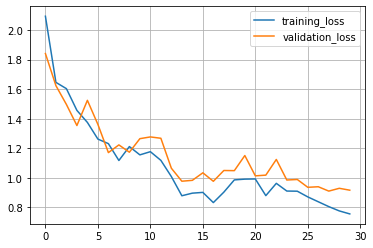

In [25]:
df = pd.DataFrame()
df['training_loss'] = m_h2.history['loss']
#df['accuracy'] = model_history.history['accuracy']
df['validation_loss'] = m_h2.history['val_loss']
df.plot(grid=True)

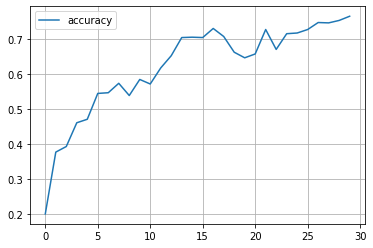

In [26]:
df = pd.DataFrame()
df['accuracy'] = m_h2.history['accuracy']
df.plot(grid=True)

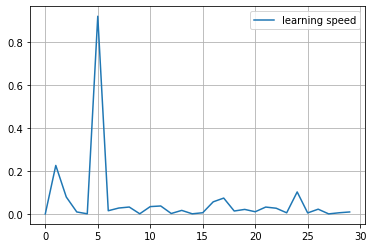

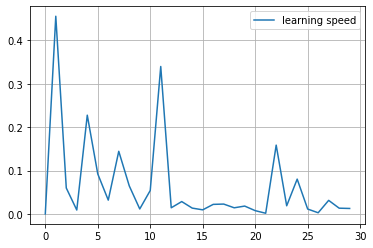

In [27]:
df = pd.DataFrame()
for i in range(0,len(weights)):
        w = weights[i]
        W = final_w[i]
        learning_speed = [0]
        cnt=0
        for i in range(1,len(w)):
            wold = w[i-1]
            wnew = w[i]
            diff = wold-wnew
            d = wnew
            m = np.median(d[d>0])
            d[d==0] = m
            diff = abs(diff)/d
            if diff.size:
                avg = abs(np.mean(diff))
            else:
                avg = 0
            learning_speed.append(avg)
        df['learning speed'] = learning_speed
        df.plot(grid=True)

In [28]:
print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 30)                23550     
_________________________________________________________________
dense_3 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                310       
Total params: 24,790
Trainable params: 24,790
Non-trainable params: 0
_________________________________________________________________
None


# For 3 Hidden Layers

In [29]:
model3 = Sequential()
start_time = time.time()
model3.add(Dense(30, activation= "sigmoid"))
model3.add(Dense(30, activation= "sigmoid"))
model3.add(Dense(10, activation='softmax'))
weights1 = []
weights2 = []
weights3 = []
save_weights1 = LambdaCallback(on_epoch_end=lambda batch, logs: weights1.append(model3.layers[0].get_weights()[0]))
save_weights2 = LambdaCallback(on_epoch_end=lambda batch, logs: weights2.append(model3.layers[1].get_weights()[0]))
save_weights3 = LambdaCallback(on_epoch_end=lambda batch, logs: weights3.append(model3.layers[1].get_weights()[0]))
model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
m_h3 = model3.fit(train_x, train_y,validation_data = (x_val,y_val), epochs=30, batch_size=10, callbacks = [save_weights1,save_weights2,save_weights3])
final_w = [model3.layers[0].get_weights()[0],model3.layers[1].get_weights()[0],model3.layers[2].get_weights()[0]]
weights = [weights1,weights2,weights3]                                                                              
total_time = (time.time()-start_time)
print("--- %s seconds ---" % total_time)

Epoch 1/30
100/100 [==============================] - 1s 9ms/step - loss: 2.2963 - accuracy: 0.1405 - val_loss: 1.9160 - val_accuracy: 0.1883
Epoch 2/30
100/100 [==============================] - 1s 8ms/step - loss: 1.9601 - accuracy: 0.1684 - val_loss: 1.8662 - val_accuracy: 0.2117
Epoch 3/30
100/100 [==============================] - 1s 8ms/step - loss: 1.8918 - accuracy: 0.1999 - val_loss: 1.9242 - val_accuracy: 0.2272
Epoch 4/30
100/100 [==============================] - 1s 8ms/step - loss: 1.9226 - accuracy: 0.1918 - val_loss: 2.3381 - val_accuracy: 0.1276
Epoch 5/30
100/100 [==============================] - 1s 8ms/step - loss: 2.0426 - accuracy: 0.1668 - val_loss: 1.8334 - val_accuracy: 0.3121
Epoch 6/30
100/100 [==============================] - 1s 8ms/step - loss: 1.9271 - accuracy: 0.2088 - val_loss: 2.0002 - val_accuracy: 0.2142
Epoch 7/30
100/100 [==============================] - 1s 9ms/step - loss: 1.8937 - accuracy: 0.2613 - val_loss: 1.6901 - val_accuracy: 0.3069
Epoch 

In [36]:
predict_train = model3.predict_classes(train_x)
acc_train = np.where(train_y == predict_train)[0].shape[0]/train_x.shape[0]
print('Training accuracy for 3 layer = {}'.format(acc_train))
predict_test = model3.predict_classes(x_test)
acc_test = np.where(y_test == predict_test)[0].shape[0]/x_test.shape[0]
print('Testing accuracy for 3 layer = {}'.format(acc_test))
print('Total run time = {} seconds'.format(total_time))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Training accuracy for 3 layer = 0.4
Testing accuracy for 3 layer = 0.3614
Total run time = 25.547838926315308 seconds


In [37]:
# evaluate the model
_, train_acc = model3.evaluate(train_x, train_y, verbose=0)
_, test_acc = model3.evaluate(x_test, y_test, verbose=0)
print('Train accuracy: %.3f, Test accuracy: %.3f' % (train_acc, test_acc))
print('Total run time = {} seconds'.format(total_time))

Train accuracy: 0.400, Test accuracy: 0.361
Total run time = 25.547838926315308 seconds


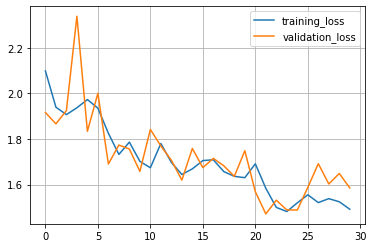

In [38]:
df = pd.DataFrame()
df['training_loss'] = m_h3.history['loss']
#df['accuracy'] = model_history.history['accuracy']
df['validation_loss'] = m_h3.history['val_loss']
df.plot(grid=True)

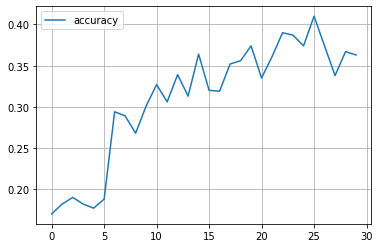

In [39]:
df = pd.DataFrame()
df['accuracy'] = m_h3.history['accuracy']
df.plot(grid=True)

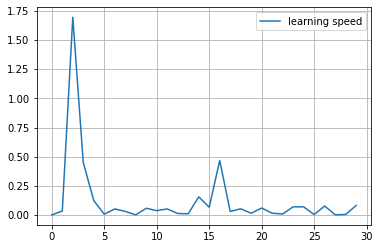

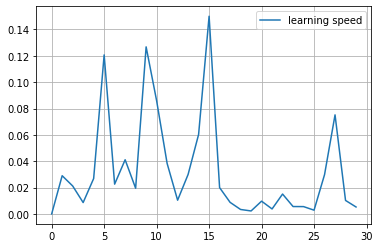

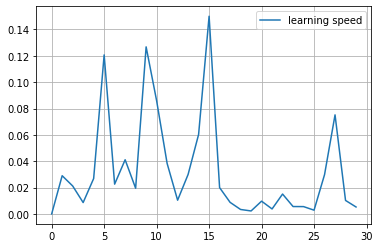

In [40]:
df = pd.DataFrame()
for i in range(0,len(weights)):
        w = weights[i]
        W = final_w[i]
        learning_speed = [0]
        cnt=0
        for i in range(1,len(w)):
            wold = w[i-1]
            wnew = w[i]
            diff = wold-wnew
            d = wnew
            m = np.median(d[d>0])
            d[d==0] = m
            diff = abs(diff)/d
            if diff.size:
                avg = abs(np.mean(diff))
            else:
                avg = 0
            learning_speed.append(avg)
        df['learning speed'] = learning_speed
        df.plot(grid=True)

In [41]:
print(model3.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 30)                23550     
_________________________________________________________________
dense_6 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_7 (Dense)              (None, 10)                310       
Total params: 24,790
Trainable params: 24,790
Non-trainable params: 0
_________________________________________________________________
None


# For 1 Hidden Layers with regularization

In [42]:
from keras import regularizers
model_r = Sequential()
start_time = time.time()
model_r.add(Dense(30, activation= "sigmoid",kernel_regularizer=regularizers.l2(5)))
model_r.add(Dense(10, activation='softmax'))
weights = []
save_weights = LambdaCallback(on_epoch_end=lambda batch, logs: weights.append(model_r.layers[0].get_weights()[0]))
model_r.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
m_h_r = model_r.fit(train_x, train_y,validation_data = (x_val,y_val), epochs=30, batch_size=10,callbacks = [save_weights])
final_w = [model_r.layers[0].get_weights()[0]]
weights = [weights]
total_time = (time.time()-start_time)
print("--- %s seconds ---" % total_time)

Epoch 1/30
100/100 [==============================] - 1s 9ms/step - loss: 86.7496 - accuracy: 0.0897 - val_loss: 2.3684 - val_accuracy: 0.0961
Epoch 2/30
100/100 [==============================] - 1s 8ms/step - loss: 2.3676 - accuracy: 0.0800 - val_loss: 2.3469 - val_accuracy: 0.1009
Epoch 3/30
100/100 [==============================] - 1s 8ms/step - loss: 2.3441 - accuracy: 0.1008 - val_loss: 2.3327 - val_accuracy: 0.0983
Epoch 4/30
100/100 [==============================] - 1s 8ms/step - loss: 2.3430 - accuracy: 0.1030 - val_loss: 2.3508 - val_accuracy: 0.0961
Epoch 5/30
100/100 [==============================] - 1s 8ms/step - loss: 2.3438 - accuracy: 0.0956 - val_loss: 2.3217 - val_accuracy: 0.1064
Epoch 6/30
100/100 [==============================] - 1s 8ms/step - loss: 2.3307 - accuracy: 0.0878 - val_loss: 2.3190 - val_accuracy: 0.0983
Epoch 7/30
100/100 [==============================] - 1s 8ms/step - loss: 2.3300 - accuracy: 0.0780 - val_loss: 2.3343 - val_accuracy: 0.0967
Epoch

In [43]:
predict_train = model_r.predict_classes(train_x)
acc_train = np.where(train_y == predict_train)[0].shape[0]/train_x.shape[0]
print('Training accuracy for 1 hidden layer with regularization = {}'.format(acc_train))
predict_test = model_r.predict_classes(x_test)
acc_test = np.where(y_test == predict_test)[0].shape[0]/x_test.shape[0]
print('Testing accuracy for 1 hidden layer with regularization = {}'.format(acc_test))
print('Total run time = {} seconds'.format(total_time))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Training accuracy for 1 hidden layer with regularization = 0.1
Testing accuracy for 1 hidden layer with regularization = 0.101
Total run time = 24.994810819625854 seconds


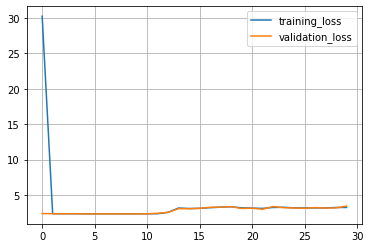

In [44]:
df = pd.DataFrame()
df['training_loss'] = m_h_r.history['loss']
#df['accuracy'] = model_history.history['accuracy']
df['validation_loss'] = m_h_r.history['val_loss']
df.plot(grid=True)

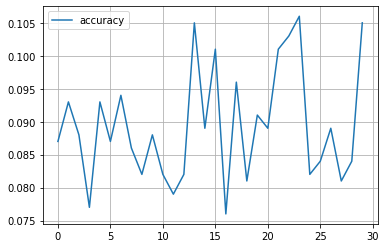

In [45]:
df = pd.DataFrame()
df['accuracy'] = m_h_r.history['accuracy']
df.plot(grid=True)

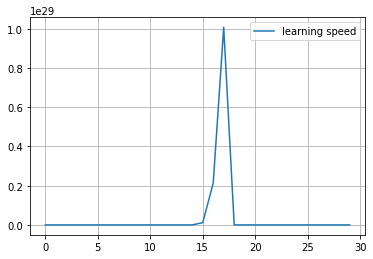

In [46]:
df = pd.DataFrame()
for i in range(0,len(weights)):
        w = weights[i]
        W = final_w[i]
        learning_speed = [0]
        cnt=0
        for i in range(1,len(w)):
            wold = w[i-1]
            wnew = w[i]
            diff = wold-wnew
            d = wnew
            m = np.median(d[d>0])
            d[d==0] = m
            diff = abs(diff)/d
            if diff.size:
                avg = abs(np.mean(diff))
            else:
                avg = 0
            learning_speed.append(avg)
        df['learning speed'] = learning_speed
        df.plot(grid=True)

In [47]:
print(model_r.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 30)                23550     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                310       
Total params: 23,860
Trainable params: 23,860
Non-trainable params: 0
_________________________________________________________________
None


# For 2 Hidden Layers with regularization

In [48]:
model_r2 = Sequential()
start_time = time.time()
model_r2.add(Dense(30, activation= "sigmoid",kernel_regularizer=regularizers.l2(5)))
model_r2.add(Dense(30, activation= "sigmoid",kernel_regularizer=regularizers.l2(5)))
model_r2.add(Dense(10, activation='softmax'))
weights1 = []
weights2 = []
save_weights1 = LambdaCallback(on_epoch_end=lambda batch, logs: weights1.append(model_r2.layers[0].get_weights()[0]))
save_weights2 = LambdaCallback(on_epoch_end=lambda batch, logs: weights2.append(model_r2.layers[1].get_weights()[0]))
model_r2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
m_h_r2 = model_r2.fit(train_x, train_y,validation_data = (x_val,y_val), epochs=30, batch_size=10,callbacks = [save_weights1,save_weights2])
final_w = [model_r2.layers[0].get_weights()[0],model_r2.layers[1].get_weights()[0]]
weights = [weights1,weights2]
total_time = (time.time()-start_time)
print("--- %s seconds ---" % total_time)

Epoch 1/30
100/100 [==============================] - 1s 10ms/step - loss: 105.7942 - accuracy: 0.1209 - val_loss: 2.3719 - val_accuracy: 0.0990
Epoch 2/30
100/100 [==============================] - 1s 8ms/step - loss: 2.3128 - accuracy: 0.1229 - val_loss: 2.3333 - val_accuracy: 0.0983
Epoch 3/30
100/100 [==============================] - 1s 8ms/step - loss: 2.3347 - accuracy: 0.0959 - val_loss: 2.3266 - val_accuracy: 0.0983
Epoch 4/30
100/100 [==============================] - 1s 8ms/step - loss: 2.3313 - accuracy: 0.1102 - val_loss: 2.3229 - val_accuracy: 0.1064
Epoch 5/30
100/100 [==============================] - 1s 8ms/step - loss: 2.3399 - accuracy: 0.0801 - val_loss: 2.3192 - val_accuracy: 0.0961
Epoch 6/30
100/100 [==============================] - 1s 8ms/step - loss: 2.3470 - accuracy: 0.0728 - val_loss: 2.3229 - val_accuracy: 0.1009
Epoch 7/30
100/100 [==============================] - 1s 8ms/step - loss: 2.3375 - accuracy: 0.0941 - val_loss: 2.3145 - val_accuracy: 0.1090
Epo

In [54]:
predict_train = model_r2.predict_classes(train_x)
acc_train = np.where(train_y == predict_train)[0].shape[0]/train_x.shape[0]
print('Training accuracy for 2 hidden layer with regularization = {}'.format(acc_train))
predict_test = model_r2.predict_classes(x_test)
acc_test = np.where(y_test == predict_test)[0].shape[0]/x_test.shape[0]
print('Testing accuracy for 2 hidden layer with regularization = {}'.format(acc_test))
print('Total run time = {} seconds'.format(total_time))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Training accuracy for 2 hidden layer with regularization = 0.1
Testing accuracy for 2 hidden layer with regularization = 0.1032
Total run time = 25.050969123840332 seconds


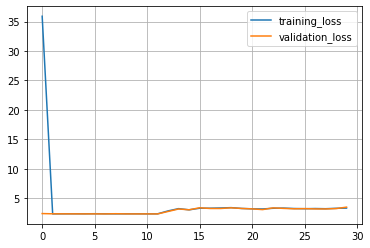

In [55]:
df = pd.DataFrame()
df['training_loss'] = m_h_r2.history['loss']
#df['accuracy'] = model_history.history['accuracy']
df['validation_loss'] = m_h_r2.history['val_loss']
df.plot(grid=True)

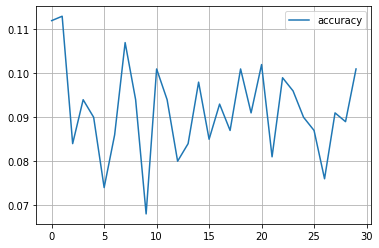

In [56]:
df = pd.DataFrame()
df['accuracy'] = m_h_r2.history['accuracy']
df.plot(grid=True)

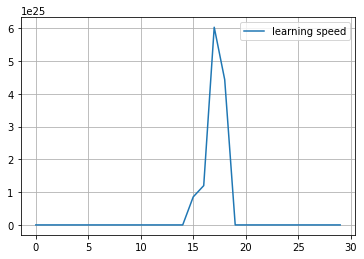

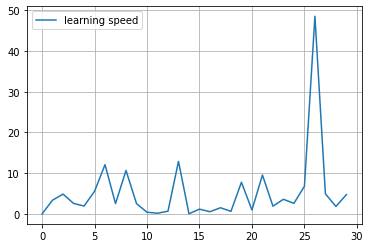

In [57]:
df = pd.DataFrame()
for i in range(0,len(weights)):
        w = weights[i]
        W = final_w[i]
        learning_speed = [0]
        cnt=0
        for i in range(1,len(w)):
            wold = w[i-1]
            wnew = w[i]
            diff = wold-wnew
            d = wnew
            m = np.median(d[d>0])
            d[d==0] = m
            diff = abs(diff)/d
            if diff.size:
                avg = abs(np.mean(diff))
            else:
                avg = 0
            learning_speed.append(avg)
        df['learning speed'] = learning_speed
        df.plot(grid=True)

In [58]:
print(model_r2.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 30)                23550     
_________________________________________________________________
dense_11 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_12 (Dense)             (None, 10)                310       
Total params: 24,790
Trainable params: 24,790
Non-trainable params: 0
_________________________________________________________________
None


# For 3 Hidden Layers with regularization

In [59]:
model_r3 = Sequential()
start_time = time.time()
model_r3.add(Dense(30, activation= "sigmoid",kernel_regularizer=regularizers.l2(5)))

model_r3.add(Dense(30, activation= "sigmoid",kernel_regularizer=regularizers.l2(5)))
model_r3.add(Dense(30, activation= "sigmoid",kernel_regularizer=regularizers.l2(5)))
model_r3.add(Dense(10, activation='softmax'))
weights1 = []
weights2 = []
weights3 = []
save_weights1 = LambdaCallback(on_epoch_end=lambda batch, logs: weights1.append(model_r3.layers[0].get_weights()[0]))
save_weights2 = LambdaCallback(on_epoch_end=lambda batch, logs: weights2.append(model_r3.layers[1].get_weights()[0]))
save_weights3 = LambdaCallback(on_epoch_end=lambda batch, logs: weights3.append(model_r3.layers[1].get_weights()[0]))
model_r3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
m_h_r3 = model_r3.fit(train_x, train_y,validation_data = (x_val,y_val), epochs=30, batch_size=10,callbacks = [save_weights1,save_weights2,save_weights3])
final_w = [model_r3.layers[0].get_weights()[0],model_r3.layers[1].get_weights()[0],model_r3.layers[2].get_weights()[0]]
weights = [weights1,weights2,weights3]
total_time = (time.time()-start_time)
print("--- %s seconds ---" % total_time)

Epoch 1/30
100/100 [==============================] - 2s 15ms/step - loss: 122.6703 - accuracy: 0.1033 - val_loss: 2.3688 - val_accuracy: 0.0983
Epoch 2/30
100/100 [==============================] - 1s 13ms/step - loss: 2.3541 - accuracy: 0.0797 - val_loss: 2.3378 - val_accuracy: 0.1090
Epoch 3/30
100/100 [==============================] - 1s 10ms/step - loss: 2.3494 - accuracy: 0.0887 - val_loss: 2.3098 - val_accuracy: 0.0967
Epoch 4/30
100/100 [==============================] - 1s 8ms/step - loss: 2.3278 - accuracy: 0.0838 - val_loss: 2.3499 - val_accuracy: 0.0991
Epoch 5/30
100/100 [==============================] - 1s 9ms/step - loss: 2.3443 - accuracy: 0.0918 - val_loss: 2.3079 - val_accuracy: 0.1009
Epoch 6/30
100/100 [==============================] - 1s 8ms/step - loss: 2.3199 - accuracy: 0.0932 - val_loss: 2.3196 - val_accuracy: 0.1030
Epoch 7/30
100/100 [==============================] - 1s 8ms/step - loss: 2.3185 - accuracy: 0.1204 - val_loss: 2.3384 - val_accuracy: 0.1064
E

In [60]:
predict_train = model_r3.predict_classes(train_x)
acc_train = np.where(train_y == predict_train)[0].shape[0]/train_x.shape[0]
print('Training accuracy for 3 hidden layer with regularization = {}'.format(acc_train))
predict_test = model_r3.predict_classes(x_test)
acc_test = np.where(y_test == predict_test)[0].shape[0]/x_test.shape[0]
print('Testing accuracy for 3 hidden layer with regularization = {}'.format(acc_test))
print('Total run time = {} seconds'.format(total_time))

Training accuracy for 3 hidden layer with regularization = 0.1


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Testing accuracy for 3 hidden layer with regularization = 0.1032
Total run time = 27.823678493499756 seconds


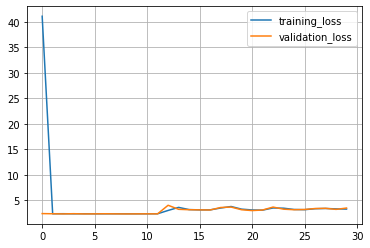

In [67]:
df = pd.DataFrame()
df['training_loss'] = m_h_r3.history['loss']
#df['accuracy'] = model_history.history['accuracy']
df['validation_loss'] = m_h_r3.history['val_loss']
df.plot(grid=True)

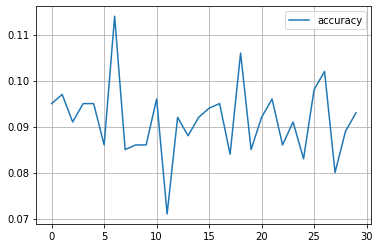

In [66]:
df = pd.DataFrame()
df['accuracy'] = m_h_r3.history['accuracy']
df.plot(grid=True)

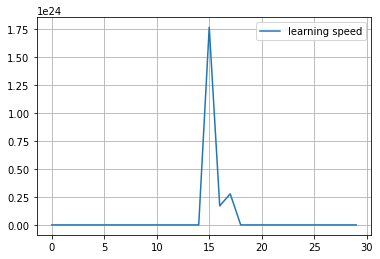

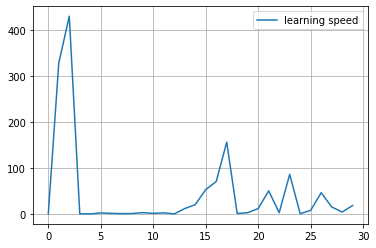

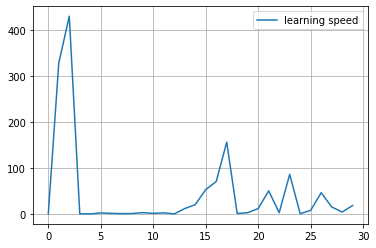

In [65]:
df = pd.DataFrame()
for i in range(0,len(weights)):
        w = weights[i]
        W = final_w[i]
        learning_speed = [0]
        cnt=0
        for i in range(1,len(w)):
            wold = w[i-1]
            wnew = w[i]
            diff = wold-wnew
            d = wnew
            m = np.median(d[d>0])
            d[d==0] = m
            diff = abs(diff)/d
            if diff.size:
                avg = abs(np.mean(diff))
            else:
                avg = 0
            learning_speed.append(avg)
        df['learning speed'] = learning_speed
        df.plot(grid=True)

In [64]:
print(model_r3.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 30)                23550     
_________________________________________________________________
dense_14 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_15 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_16 (Dense)             (None, 10)                310       
Total params: 25,720
Trainable params: 25,720
Non-trainable params: 0
_________________________________________________________________
None


# CNN

In [71]:
import matplotlib.pyplot as pyplot

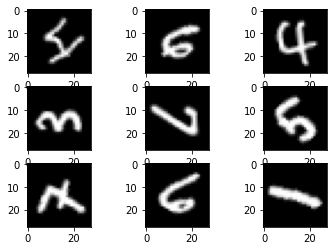

In [72]:
##testing###

from keras.preprocessing.image import ImageDataGenerator

train_x = train_x.reshape((train_x.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))
# convert from int to float
train_x = train_x.astype('float32')
x_test = x_test.astype('float32')
# define data preparation
datagen = ImageDataGenerator(rotation_range=90)
# fit parameters from data
datagen.fit(train_x)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(train_x, train_y, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# plot
	pyplot.show()
	break


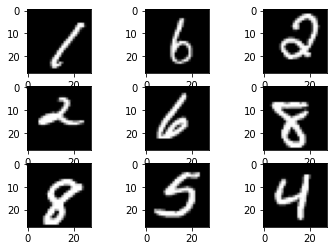

In [73]:
shift = 3
datagen = ImageDataGenerator(width_shift_range=shift, height_shift_range=shift)
# fit parameters from data
datagen.fit(train_x)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(train_x, train_y, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break

In [74]:
datagen = ImageDataGenerator(
        rotation_range=3,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=3,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=3)  # randomly flip images

In [75]:
x_val = x_val.reshape((x_val.shape[0], 28, 28, 1))

In [76]:
x_val.shape, train_x.shape , x_test.shape

((10000, 28, 28, 1), (1000, 28, 28, 1), (10000, 28, 28, 1))

In [77]:
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

from keras.layers.core import Dropout
model_cnn = Sequential()
model_cnn.add(Conv2D(30, kernel_size=(5,5), strides=(1,1), activation='sigmoid', input_shape=(28,28,1)))
model_cnn.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model_cnn.add(Flatten())
model_cnn.add(Dropout(0.25))
model_cnn.add(Dense(10, activation='softmax'))
weights = []
save_weights = LambdaCallback(on_epoch_end=lambda batch, logs: weights.append(model_cnn.layers[0].get_weights()[0]))

model_cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history_cnn = model_cnn.fit(datagen.flow(train_x, train_y, batch_size=10), validation_data = (x_val,y_val), epochs=30,callbacks = [save_weights])
final_w = [model_cnn.layers[0].get_weights()[0]]
weights = [weights]
total_time = (time.time()-start_time)
print("--- %s seconds ---" % total_time)

Epoch 1/30
100/100 [==============================] - 3s 26ms/step - loss: 76.0765 - accuracy: 0.2150 - val_loss: 0.9779 - val_accuracy: 0.6966
Epoch 2/30
100/100 [==============================] - 2s 24ms/step - loss: 1.2849 - accuracy: 0.5909 - val_loss: 0.9579 - val_accuracy: 0.6835
Epoch 3/30
100/100 [==============================] - 2s 24ms/step - loss: 1.1902 - accuracy: 0.6320 - val_loss: 0.8400 - val_accuracy: 0.7315
Epoch 4/30
100/100 [==============================] - 2s 25ms/step - loss: 1.1615 - accuracy: 0.6360 - val_loss: 0.7316 - val_accuracy: 0.7453
Epoch 5/30
100/100 [==============================] - 2s 24ms/step - loss: 1.0736 - accuracy: 0.6427 - val_loss: 0.6726 - val_accuracy: 0.7659
Epoch 6/30
100/100 [==============================] - 2s 24ms/step - loss: 1.0098 - accuracy: 0.6700 - val_loss: 0.6971 - val_accuracy: 0.7740
Epoch 7/30
100/100 [==============================] - 2s 24ms/step - loss: 1.0551 - accuracy: 0.6709 - val_loss: 0.7880 - val_accuracy: 0.735

In [78]:
predict_train = model_cnn.predict_classes(train_x)
acc_train = np.where(train_y == predict_train)[0].shape[0]/train_x.shape[0]
print('Training accuracy for CNN-MNIST= {}'.format(acc_train))
predict_test = model_cnn.predict_classes(x_test)
acc_test = np.where(y_test == predict_test)[0].shape[0]/x_test.shape[0]
print('Testing accuracy for CNN-MNIST = {}'.format(acc_test))
print('Total run time = {} seconds'.format(total_time))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Training accuracy for CNN-MNIST= 0.941
Testing accuracy for CNN-MNIST = 0.889
Total run time = 294.0643229484558 seconds


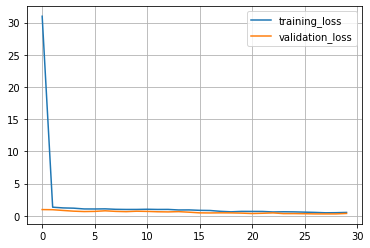

In [79]:
df = pd.DataFrame()
df['training_loss'] = history_cnn.history['loss']
df['validation_loss'] = history_cnn.history['val_loss']
df.plot(grid=True)

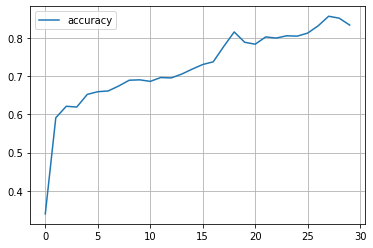

In [80]:
df = pd.DataFrame()
df['accuracy'] = history_cnn.history['accuracy']
df.plot(grid=True)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


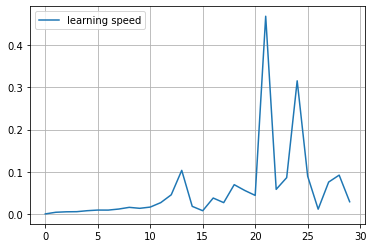

In [81]:
df = pd.DataFrame()
for i in range(0,len(weights)):
        w = weights[i]
        W = final_w[i]
        learning_speed = [0]
        cnt=0
        for i in range(1,len(w)):
            wold = w[i-1]
            wnew = w[i]
            diff = wold-wnew
            d = wnew
            m = np.median(d[d>0])
            d[d==0] = m
            diff = abs(diff)/d
            if diff.size:
                avg = abs(np.mean(diff))
            else:
                avg = 0
            learning_speed.append(avg)
        df['learning speed'] = learning_speed
        df.plot(grid=True)

In [82]:
print(model_cnn.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 30)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4320)              0         
_________________________________________________________________
dropout (Dropout)            (None, 4320)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)                43210     
Total params: 43,990
Trainable params: 43,990
Non-trainable params: 0
_________________________________________________________________
None


---------------------------------------------------------------------------------------------------------------

https://machinelearningmastery.com/polyak-neural-network-model-weight-ensemble/
#  END